# WeatherPy
----

### Analysis
* when the latitude is below the equiator( 0 Degree Latitude) temperature is high.
* when the latitude is below the equiator( 0 Degree Latitude) humidity is lower.
* Not much relation b/w latitude and cloudiness, but i noticed that the below 0 and above 60 shows       less cloud.
* when the latitude is above 60 shows high wind(above 17.5 mph).
---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import openweathermapy as owm
from pprint import pprint 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
 

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
cities_df=pd.DataFrame(cities)
cities_df.columns=["City"]
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat']=""
cities_df['Lng']=""
cities_df['Max Temp']=""
cities_df['Wind Speed']=""
cities_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,crotone,,,,,,,,
1,ancud,,,,,,,,
2,la roda,,,,,,,,
3,taltal,,,,,,,,
4,hermanus,,,,,,,,


In [4]:
#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

parms = {"units": "metric", "appid": api_key}

for index, row in cities_df.iterrows():
    
    try: 
        weather_data = owm.get_current(row['City'], **parms)
        
        print(f"Processing Record {(index+1)%50} of Set {(index+1)//50+1} | {cities[index]}")
        
        cities_df.loc[index,'Cloudiness'] = weather_data['clouds']['all']
        cities_df.loc[index, 'Country'] = weather_data['sys']['country']
        cities_df.loc[index, 'Date'] = weather_data['dt']
        cities_df.loc[index, 'Humidity'] = weather_data['main']['humidity']
        cities_df.loc[index, 'Lat'] = weather_data['coord']['lat']
        cities_df.loc[index, 'Lng'] = weather_data['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = weather_data['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = weather_data['wind']['speed']
        
    except:
        print("City not found... skipping...")
        pass
    
#Indicate that Data Loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")
                

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | crotone
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | la roda
Processing Record 4 of Set 1 | taltal
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | portland
Processing Record 8 of Set 1 | albany
City not found... skipping...
Processing Record 10 of Set 1 | alice springs
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | walvis bay
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | tasiilaq
City not found... skipping...
Processing Record 17 of Set 1 | bell ville
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | dwarka
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | goderich
Processing Record 22 of Set 1 | san pedro
Processing Record 23 of Set 1 | xiaoweizhai
Processing Reco

Processing Record 6 of Set 5 | suixi
Processing Record 7 of Set 5 | lop buri
Processing Record 8 of Set 5 | sorland
Processing Record 9 of Set 5 | vao
Processing Record 10 of Set 5 | grenada
Processing Record 11 of Set 5 | katakwi
Processing Record 12 of Set 5 | padang
Processing Record 13 of Set 5 | cidreira
Processing Record 14 of Set 5 | karratha
Processing Record 15 of Set 5 | malanje
Processing Record 16 of Set 5 | palmas
Processing Record 17 of Set 5 | tiksi
Processing Record 18 of Set 5 | puerto barrios
Processing Record 19 of Set 5 | ilhabela
Processing Record 20 of Set 5 | eureka
Processing Record 21 of Set 5 | santa isabel do rio negro
Processing Record 22 of Set 5 | nikolskoye
City not found... skipping...
Processing Record 24 of Set 5 | ambilobe
Processing Record 25 of Set 5 | kombissiri
Processing Record 26 of Set 5 | naze
Processing Record 27 of Set 5 | mar del plata
Processing Record 28 of Set 5 | bhadasar
Processing Record 29 of Set 5 | chenghai
Processing Record 30 of 

Processing Record 12 of Set 9 | tirumala
Processing Record 13 of Set 9 | middelburg
City not found... skipping...
Processing Record 15 of Set 9 | maravilha
Processing Record 16 of Set 9 | beringovskiy
Processing Record 17 of Set 9 | nova vcelnice
Processing Record 18 of Set 9 | funtua
Processing Record 19 of Set 9 | nishihara
Processing Record 20 of Set 9 | veraval
Processing Record 21 of Set 9 | samarai
Processing Record 22 of Set 9 | sorong
City not found... skipping...
Processing Record 24 of Set 9 | paro
Processing Record 25 of Set 9 | bronnoysund
Processing Record 26 of Set 9 | muroto
Processing Record 27 of Set 9 | san luis
City not found... skipping...
Processing Record 29 of Set 9 | mahibadhoo
Processing Record 30 of Set 9 | desnogorsk
Processing Record 31 of Set 9 | ust-tsilma
Processing Record 32 of Set 9 | arraial do cabo
Processing Record 33 of Set 9 | bam
Processing Record 34 of Set 9 | zafra
Processing Record 35 of Set 9 | imeni zhelyabova
City not found... skipping...
Pr

Processing Record 14 of Set 13 | jabinyanah
Processing Record 15 of Set 13 | cooma
City not found... skipping...
Processing Record 17 of Set 13 | roma
Processing Record 18 of Set 13 | alugan
----------------------------
Data Retrieval Complete     
----------------------------


In [5]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,crotone,0,IT,1547743800,87,39.09,17.12,11,3.6
1,ancud,20,CL,1547744400,59,-41.87,-73.83,18,3.6
2,la roda,75,ES,1547744400,70,39.21,-2.16,7,4.1
3,taltal,0,CL,1547746841,70,-25.41,-70.49,22.13,1.89
4,hermanus,0,ZA,1547746842,60,-34.42,19.24,21.83,1.16


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5,1,'Latitude vs. Max Temperatue (12/25/2018)')

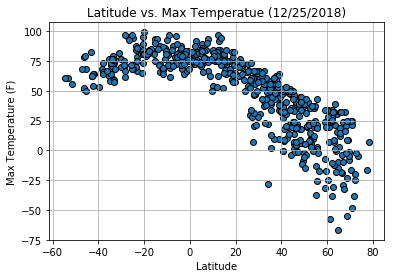

In [6]:
Latplot=pd.to_numeric(cities_df.Lat)
Templot=pd.to_numeric(cities_df['Max Temp'])
fahrplot = (Templot * 1.8) + 32
plt.scatter(Latplot,fahrplot,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Max Temperatue (12/25/2018)")

#### Latitude vs. Humidity Plot

Text(0.5,1,'Latitude vs. Humidity (12/25/2018)')

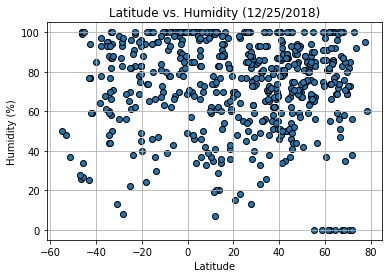

In [7]:
Latplot=pd.to_numeric(cities_df.Lat)
Humplot=pd.to_numeric(cities_df['Humidity'])
plt.scatter(Latplot,Humplot,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity (12/25/2018)")

#### Latitude vs. Cloudiness Plot

Text(0.5,1,'Latitude vs. Cloudiness (12/25/2018)')

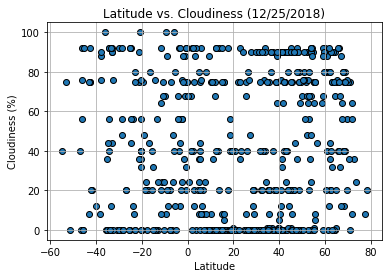

In [8]:
Latplot=pd.to_numeric(cities_df.Lat)
Cloudplot=pd.to_numeric(cities_df['Cloudiness'])
plt.scatter(Latplot,Cloudplot,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness (12/25/2018)")

#### Latitude vs. Wind Speed Plot

Text(0.5,1,'Latitude vs. Wind Speed (12/25/2018)')

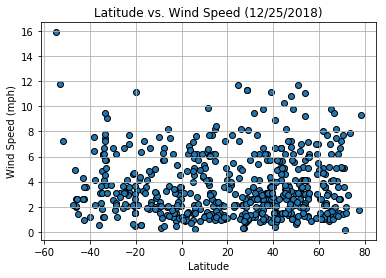

In [9]:
Latplot=pd.to_numeric(cities_df.Lat)
Windplot=pd.to_numeric(cities_df['Wind Speed'])
plt.scatter(Latplot,Windplot,edgecolor='k')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed (12/25/2018)")